In [1]:
import rclpy
import sys
from rclpy.node import Node
from sensor_msgs.msg import Image
import numpy as np
import cv2
from cv_bridge import CvBridge

In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from IPython.display import display, clear_output
import ipywidgets as widgets
import threading

Text(0.5, 1.0, 'USB CAM Image')

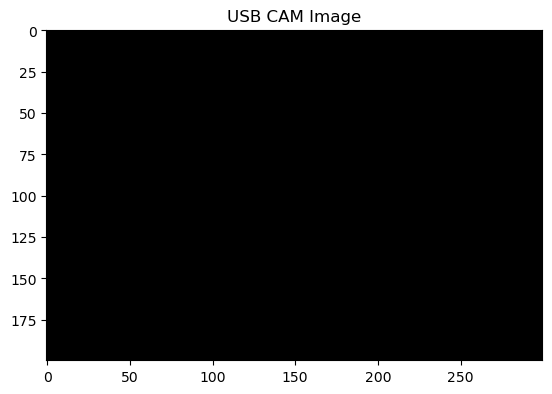

In [3]:
bridge = CvBridge() 
fig, ax = plt.subplots()
empty_image = np.zeros((200, 300, 3), dtype=np.uint8)
img_obj = ax.imshow(empty_image)
ax.set_title('USB CAM Image')

In [4]:
def callback_image(topic):
    image = bridge.imgmsg_to_cv2(topic, 'rgb8')
    img_obj.set_data(image)
    clear_output(wait=True)
    display(fig)

In [5]:
rclpy.init(args=sys.argv)
node = rclpy.create_node('sub_image')

In [6]:
sub = node.create_subscription(Image, '/image_raw', callback_image, 10)

In [ ]:
rclpy.spin(node)